In [15]:
import numpy as np
import pandas as pd

In [16]:
### 初始化模型参数
def initialize_params(dims):
    """
    输入：
    dims: 训练数据的变量维度
    输出：
    w: 初始化权重系数
    b: 初始化偏置参数
    """
    # 初始化权重系数为零向量
    w = np.zeros((dims, 1))
    
    # 初始化偏置参数为零
    b = 0
    
    return w, b

1. 均方损失函数是机器学习常用的损失函数
$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$

2. 假设模型是线性模型，即：
$$
\hat{y}=Xw
$$
其中：
    - $x$是输入数据矩阵，shape是(n, d)
    - $w$是权重系数向量，shape是(d, 1)
    - $y$是预测值向量，shape是(n, 1)

3. 关键问题在于求梯度
我们需要计算损失函数对权重系数$w$的梯度，以便进行梯度下降。
MSE是对权重系数向量求导，即：
$\nabla_w \text{MSE} = \frac{\partial \text{MSE}}{\partial w}$，其中$\nabla$代表对每个变量以此求导。
将$\hat{y}=Xw$代入$MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$。此时对于每个$w_j$求导得到
$$
\frac{\partial \text{MSE}}{\partial w_j} = \frac{1}{n} \sum_{i=1}^{n} 2 (\hat{y}_i - y_i) (X_{ij})
$$
向量化之后，化简为：
$$
\nabla_w \text{MSE} = \frac{1}{n} X^T (\hat{y} - y)
$$


In [17]:
def linear_loss(X, y, w, b):
    """
    输入：
    X: 输入变量矩阵
    y: 输出标签向量
    w: 变量参数权重矩阵
    b: 偏置
    输出：
    y_hat: 线性回归模型预测值
    loss: 均方损失
    dw: 权重系数一阶偏导
    db: 偏置一阶偏导
    """
    
    # 训练样本量
    num_train = X.shape[0]
    
    # 训练特征数
    num_feature = X.shape[1]
    
    # 线性回归预测值
    y_hat = np.dot(X, w) + b
    
    # 计算预测值与实际标签之间的均方损失
    loss = np.sum((y_hat - y) ** 2) / num_train
    
    # 基于均方损失对权重系数的一阶梯度（化简过程如上）
    dw = np.dot(X.T, (y_hat - y)) / num_train
    
    # 基于均方损失对偏置的一阶梯度
    db = np.sum((y_hat - y)) / num_train
    
    return y_hat, loss, dw, db

In [18]:
### 定义线性回归模型训练过程
def linear_train(X, y, learning_rate=0.01, epochs=10000):
    """
    输入：
    X：输入变量矩阵
    y：输出标签向量
    learning_rate：学习率
    epochs：训练迭代次数
    输出：
    loss_his：每次迭代的均方损失
    params：优化后的参数字典
    grads：优化后的参数梯度字典
    """
    # 记录训练损失的空列表
    loss_his = []
    
    # 初始化模型参数
    w, b = initialize_params(X.shape[1])
    
    # 迭代训练
    for i in range(1, epochs):
        # 计算当前迭代的预测值、损失和梯度
        y_hat, loss, dw, db = linear_loss(X, y, w, b)
        
        # 基于梯度下降的参数更新
        w += -learning_rate * dw
        b += -learning_rate * db
        
        # 记录当前迭代的损失
        loss_his.append(loss)
        # 每1000次迭代打印当前损失信息
        if i % 10000 == 0:
            print('epoch %d loss %f' % (i, loss))
            
        # 将当前迭代步优化后的参数保存到字典
        params = {
            'w': w,
            'b': b
        }
        # 将当前迭代步的梯度保存到字典
        grads = {
            'dw': dw,
            'db': db
        }
    return loss_his, params, grads

In [19]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target 
print("data size:   ", data.shape)
print("target size: ", target.shape)
print(data[:5])
print(target[:5])

data size:    (442, 10)
target size:  (442,)
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
[151.  75. 141. 206. 135.]


In [20]:
# 导入sklearn diabetes数据接口
from sklearn.datasets import load_diabetes
# 导入sklearn打乱数据函数
from sklearn.utils import shuffle

# 获取diabetes数据集
diabetes = load_diabetes()
# 获取输入和标签
data, target = diabetes.data, diabetes.target 
# 打乱数据集

X, y = shuffle(data, target, random_state=13)
# 按照8/2划分训练集和测试集
offset = int(X.shape[0] * 0.8)
# 训练集
X_train, y_train = X[:offset], y[:offset]
# 测试集
X_test, y_test = X[offset:], y[offset:]
# 将训练集改为列向量的形式
y_train = y_train.reshape((-1,1))
# 将验证集改为列向量的形式
y_test = y_test.reshape((-1,1))
# 打印训练集和测试集维度
print("X_train's shape: ", X_train.shape)
print("X_test's shape: ", X_test.shape)
print("y_train's shape: ", y_train.shape)
print("y_test's shape: ", y_test.shape)

X_train's shape:  (353, 10)
X_test's shape:  (89, 10)
y_train's shape:  (353, 1)
y_test's shape:  (89, 1)


learning rate 的选取不能太大也不能太小，太大会导致来回震荡，无法下降，太小会导致迭代批次太多，拟合速度很慢
如果 loss function 没有在减小而是在增大，这是 learning rate 太大的典型表现
尝试 learning rate 可以指数增长，寻找最合适的参数

In [21]:
# 线性回归模型训练
loss_his, params, grads = linear_train(X_train, y_train, 0.01, 200000)
# 打印训练后得到模型参数
print(params)

epoch 10000 loss 5208.884908
epoch 20000 loss 4913.058628
epoch 30000 loss 4662.345979
epoch 40000 loss 4449.308167
epoch 50000 loss 4267.761916
epoch 60000 loss 4112.566050
epoch 70000 loss 3979.444460
epoch 80000 loss 3864.839218
epoch 90000 loss 3765.788710
epoch 100000 loss 3679.826509
epoch 110000 loss 3604.897464
epoch 120000 loss 3539.288067
epoch 130000 loss 3481.568667
epoch 140000 loss 3430.545506
epoch 150000 loss 3385.220917
epoch 160000 loss 3344.760277
epoch 170000 loss 3308.464579
epoch 180000 loss 3275.747658
epoch 190000 loss 3246.117281
{'w': array([[  55.36712019],
       [ -28.73989254],
       [ 229.09725618],
       [ 169.46425381],
       [  31.57303135],
       [  10.17739278],
       [-159.67116447],
       [ 146.03325592],
       [ 220.1249829 ],
       [ 116.01100802]]), 'b': 150.6263470272202}


In [22]:
### 定义线性回归预测函数
def predict(X, params):
    """
    输入：
    X：测试数据集
    params：模型训练参数
    输出：
    y_pred：模型预测结果
    """
    # 获取模型参数
    w = params['w']
    b = params['b']
    # 预测
    y_pred = np.dot(X, w) + b
    return y_pred
# 基于测试集的预测
y_pred = predict(X_test, params)
# 打印前五个预测值
y_pred[:5]

array([[ 83.76648317],
       [176.10184512],
       [129.79855169],
       [135.04686528],
       [168.31244469]])

In [23]:
print(y_test[:5])

[[ 37.]
 [122.]
 [ 88.]
 [214.]
 [262.]]


In [24]:
### 定义R2系数函数
def r2_score(y_test, y_pred):
    """
    输入：
    y_test：测试集标签值
    y_pred：测试集预测值
    输出：
    r2：R2系数
    """
    # 测试标签均值
    y_avg = np.mean(y_test)
    # 总离差平方和
    ss_tot = np.sum((y_test - y_avg)**2)
    # 残差平方和
    ss_res = np.sum((y_test - y_pred)**2)
    # R2计算
    r2 = 1 - (ss_res/ss_tot)
    return r2

In [25]:
print(r2_score(y_test, y_pred))

0.3847967862311892


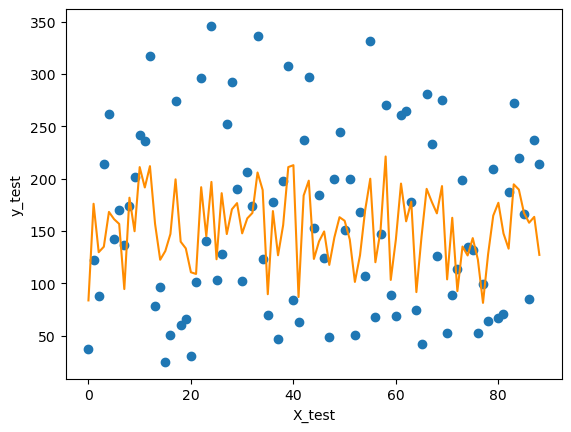

In [26]:
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show();

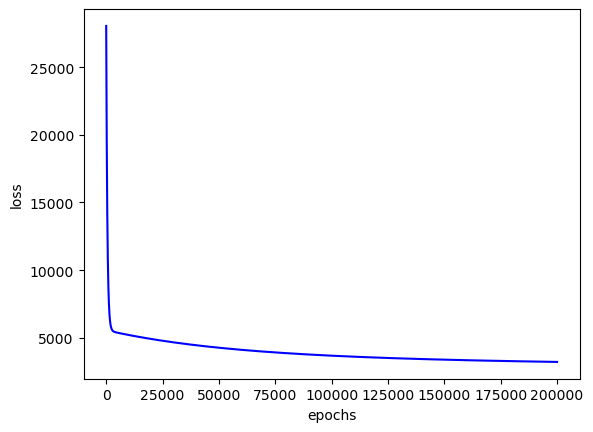

In [27]:
plt.plot(loss_his, color='blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [28]:
### sklearn版本为1.0.2
# 导入线性回归模块
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# 创建模型实例
regr = linear_model.LinearRegression()
# 模型拟合
regr.fit(X_train, y_train)
# 模型预测
y_pred = regr.predict(X_test)
# 打印模型均方误差
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# 打印R2
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 3371.87
R2 score: 0.54
